In [2]:
# house price prediction using logistic regression

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# load the dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# check the shape of the dataset
df.shape

(506, 14)

<AxesSubplot:xlabel='MEDV'>

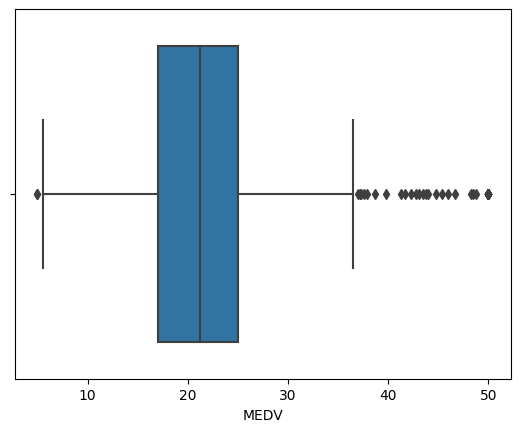

In [4]:
#box plot to check the outliers
sns.boxplot(x=df['MEDV'])

In [5]:
#remove the outliers
df = df[df['MEDV'] < 50]
df.shape

(490, 14)

In [6]:
# binninng the target variable
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
group = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['binned_MEDV'] = pd.cut(df['MEDV'], bins = bins, labels = group)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,binned_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,20-30
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,20-30
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30-40
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,30-40
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,30-40


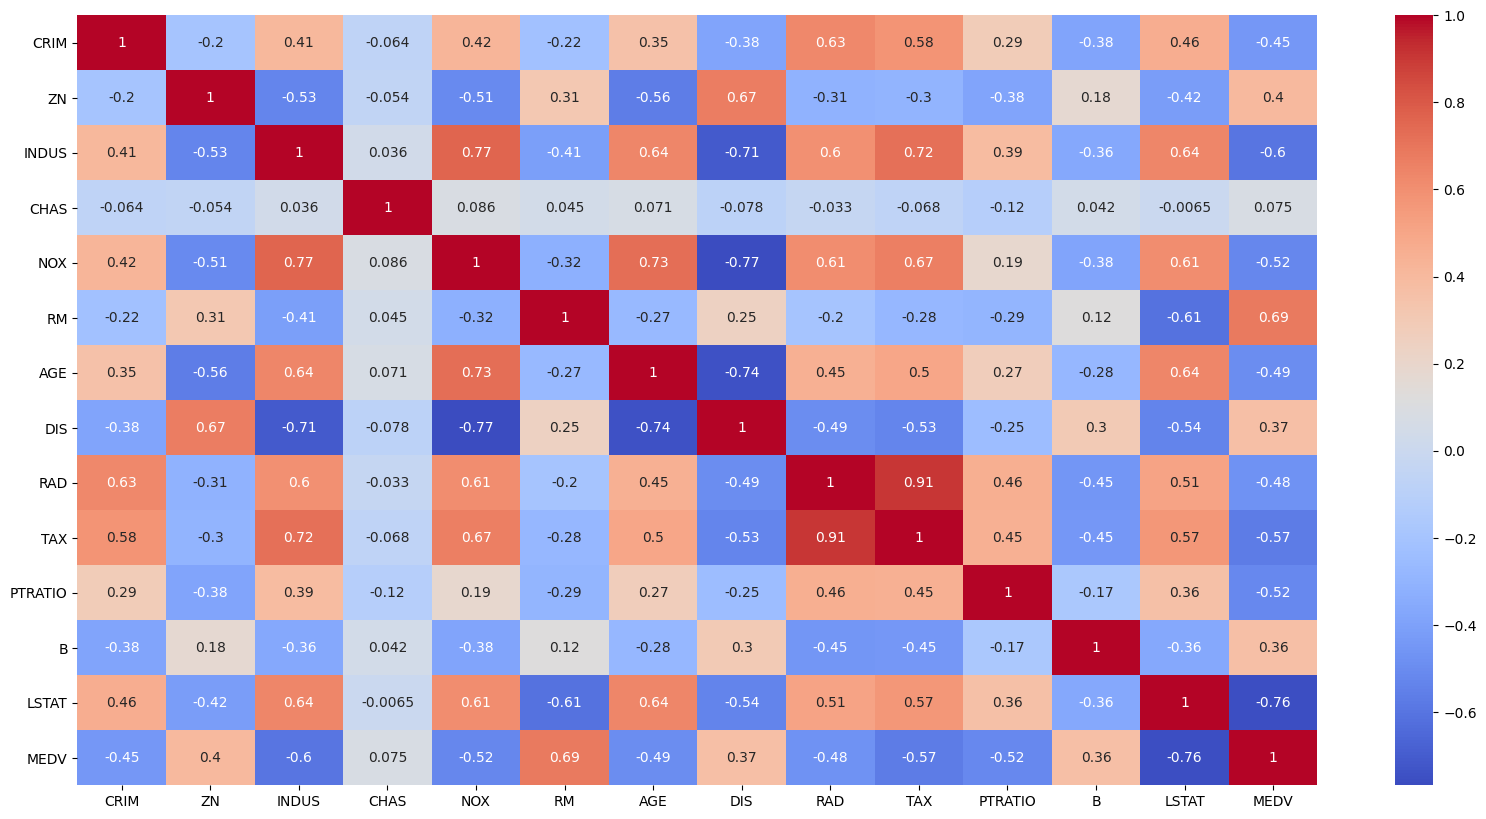

In [8]:
# plot correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
X = df.drop(['binned_MEDV'], axis=1)
y = df['binned_MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

# scaling the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
# create the model
# ignore the warning
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.8367346938775511
Confusion Matrix: 
 [[ 0  1  0  0  0]
 [ 0 19  1  0  0]
 [ 1  3 17  0  0]
 [ 0  0  1  5  1]
 [ 0  0  0  0  0]]
Classification Report: 
               precision    recall  f1-score   support

        0-10       0.00      0.00      0.00         1
       10-20       0.83      0.95      0.88        20
       20-30       0.89      0.81      0.85        21
       30-40       1.00      0.71      0.83         7
       40-50       0.00      0.00      0.00         0

    accuracy                           0.84        49
   macro avg       0.54      0.49      0.51        49
weighted avg       0.86      0.84      0.84        49



Mean Squared Error:  8.990886407745721
R2 Score:  0.8069566560733742


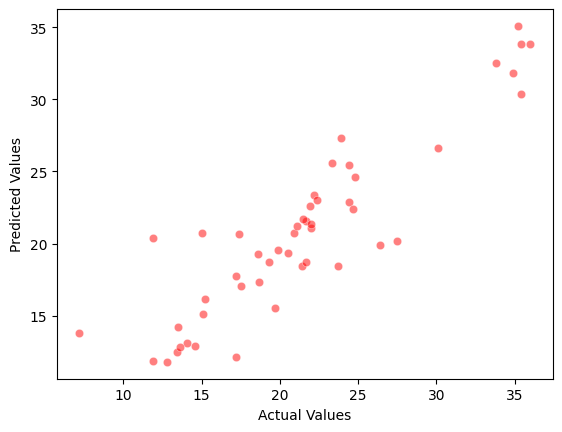

In [11]:
# using SVM regression
X = df.drop(['MEDV','binned_MEDV'], axis=1)
y = df['MEDV']

from sklearn.svm import SVR
model = SVR(kernel='poly')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)
#scaling
sc = MinMaxScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)   
model.fit(X_train_std, y_train)

# predict the test set
y_pred = model.predict(X_test_std)

# evaluate the model for regression
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

# plot the predicted values vs actual values
sns.scatterplot(y_test, y_pred, alpha=0.5, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

train accuracy:  0.9225138940748636
test accuracy:  0.8323068534960362


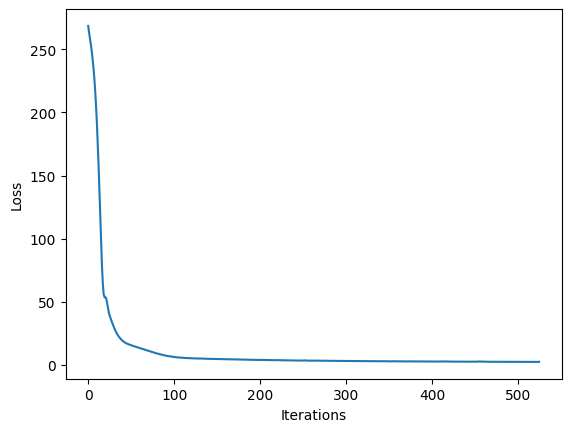

In [13]:
# using ANN regression
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=1000)
model.fit(X_train_std, y_train)

# predict the test set
y_pred = model.predict(X_test_std)

# evaluate the model
print('train accuracy: ', model.score(X_train_std, y_train))
print('test accuracy: ', model.score(X_test_std, y_test))

# plot the performance of the model
plt.plot(model.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()